In [1]:
# Importing Dependencies

import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.1/39.5 MB 9.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/39.5 MB 11.0 MB/s eta 0:00:04
   ------- -------------------------------- 7.1/39.5 MB 11.2 MB/s eta 0:00:03
   --------- ------------------------------ 9.2/39.5 MB 11.4 MB/s eta 0:00:03
   ----------- ---------------------------- 11.5/39.5 MB 11.1 MB/s eta 0:00:03
   ------------- -------------------------- 13.4/39.5 MB 10.6 MB/s eta 0:00:03
   --------------- ------------------------ 15.5/39.5 MB 10.5 MB/s eta 0:00:03
   ---------------- ----------------------- 16.8/39.5 MB 9.9 MB/s eta 0:00:03
   ------------------ --------------------- 17.8/39.5 MB 9.4 MB/s eta 0:00:03
   ------------------- -------------------- 19.4/39.5 MB 9.1 MB/s eta 0:00:03
   -------------------- ------------------- 20.7/39.5 MB 8.9 MB/s eta 0:00:03
   ---------------------- ----------------- 22.0/39.5 MB 8.7 MB/s eta 

In [2]:
dir = "C:\\Users\\Admin\\Downloads\\taskthree\\Dataset"

In [3]:


categories = ['Cat', 'Dog']

data = []

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv.imread(imgpath, 0)
        try:
            pet_img = cv.resize(pet_img, (100, 100), interpolation=cv.INTER_AREA)
            # print(pet_img.shape)
        except:
            break
        image = np.array(pet_img).flatten()
        data.append([image,label])

print(len(data))

8005


In [4]:
random.shuffle(data)

features = []
labels = []

for feature,label in data:
    features.append(feature)
    labels.append(label)

In [5]:
# Splitting 

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [6]:
# Training the model

model = SVC(C=1, kernel='poly', gamma='auto') 
model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

Accuracy : 0.584634603372892
Prediction is Cat


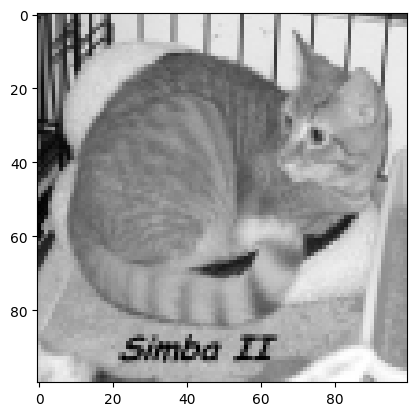

In [7]:
# Testing the model

mypet = x_test[2].reshape(100,100)
prediction = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print('Accuracy :', accuracy)
print('Prediction is', categories[prediction[2]])
plt.imshow(mypet, cmap ='gray')
plt.show()